In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
from skimage.color import rgb2yuv, rgb2hsv, rgb2gray, yuv2rgb, hsv2rgb
from scipy.signal import convolve2d

In [54]:
# Load and display the image
img = Image.open("C:\Users\shriv\Downloads\bruno-guerrero-1Ef9P85_JPg-unsplash.jpg")
plt.imshow(img)
plt.axis('off')  # Hide the axis for a cleaner look
plt.show()

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (1935130869.py, line 2)

In [9]:
#filter matric
sharpen =np.array([[0,-1,0],
                  [-1,5,-1],
                  [0,-1,0]])

blur = np.array([[0.11,0.11,0.11],
                    [0.11,0.11,0.11],
                    [0.11,0.11,0.11]])


vertical = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]])


gaussian = (1/16.0) * np.array([[1,2,1],
                                [2,4,2],
                                [1,2,1]])

Text(0.5, 1.0, 'Gaussian')

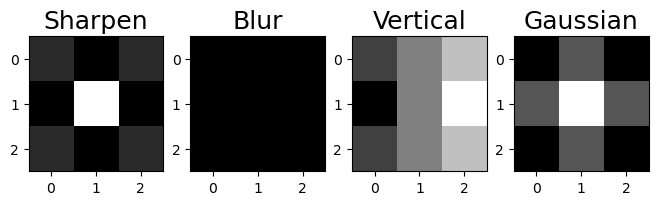

In [15]:
#plotting the filters

fig,ax = plt.subplots(1,4, figsize = (8,6))
ax[0].imshow(sharpen, cmap='gray')
ax[0].set_title(f'Sharpen', fontsize=18)

ax[1].imshow(blur, cmap='gray')
ax[1].set_title(f'Blur', fontsize=18)

ax[2].imshow(vertical, cmap='gray')
ax[2].set_title(f'Vertical', fontsize=18)

ax[3].imshow(gaussian, cmap='gray')
ax[3].set_title(f'Gaussian', fontsize=18)

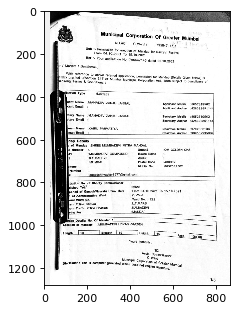

In [18]:
#Grayscaling Image
spong_gray = rgb2gray(img)
plt.figure(num=None, figsize=(6,4), dpi=80)
imshow(spong_gray)

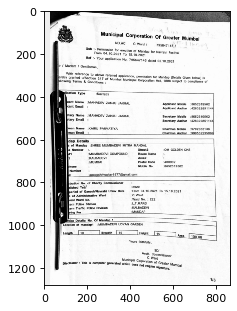

In [20]:
#Function for applying filters
def multi_convolver(image, kernel, iterations):
  for i in range(iterations):
    image = convolve2d(image, kernel, 'same',
                       boundary = 'fill', fillvalue = 0)
  return image

convolved_image = multi_convolver(spong_gray, blur, 1)

plt.figure(num=None, figsize=(6,4), dpi=80)
imshow(convolved_image);

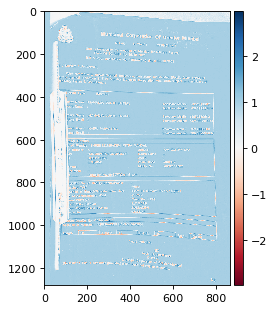

In [32]:
#Function for applying filters
def multi_convolver(image, kernel, iterations):
  for i in range(iterations):
    image = convolve2d(image, kernel, 'same',
                       boundary = 'fill', fillvalue = 0)
  return image

convolved_image = multi_convolver(spong_gray, sharpen, 1)

plt.figure(num=None, figsize=(6,4), dpi=80)
imshow(convolved_image);

In [33]:
#For colored Image
def convolver_rgb(image, kernel, iterations = 1):
  convolved_image_r = multi_convolver(image[:,:,0], kernel, iterations)
  convolved_image_g = multi_convolver(image[:,:,1], kernel, iterations)
  convolved_image_b = multi_convolver(image[:,:,2], kernel, iterations)

  reformed_image = np.dstack((np.rint(abs(convolved_image_r)),
                              np.rint(abs(convolved_image_g)),
                              np.rint(abs(convolved_image_b))))/255

  fig,ax = plt.subplots(1,3, figsize = (8,6))

  ax[0].imshow(abs(convolved_image_r), cmap='Reds')
  ax[0].set_title(f'Red', fontsize=15)

  ax[1].imshow(abs(convolved_image_g), cmap='Greens')
  ax[1].set_title(f'Green', fontsize=18)

  ax[2].imshow(abs(convolved_image_b), cmap='Blues')
  ax[2].set_title(f'Blue', fontsize=18)

  return np.array(reformed_image*255).astype(np.uint8)

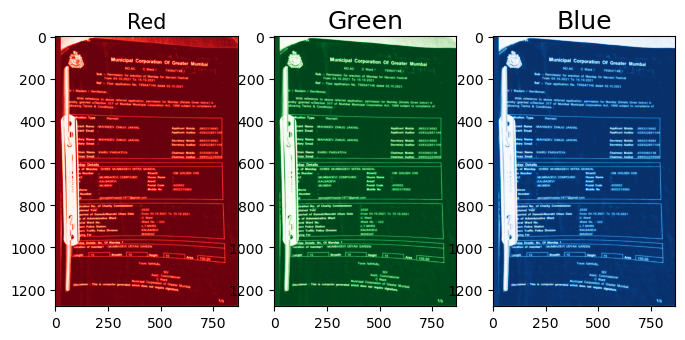

In [37]:
#Can add different filters (defined above) here
spong = np.array(img)  # Convert to NumPy array
convolved_rgb_gauss = convolver_rgb(spong, blur ,1)

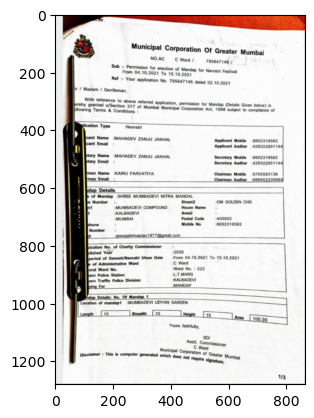

In [40]:
plt.imshow(convolved_rgb_gauss,vmin=0,vmax=255);

In [ ]:
#cnn paramater
from keras.models import Sequential
from keras.layers import Conv2D
model = Sequential()
model.add(Conv2D(32, input_shape=(28,28,3),
                 kernel_size = (5,5),
                 padding='same',
                 use_bias=False))
model.add(Conv2D(17, (3,3), padding='same', use_bias=False))
model.add(Conv2D(13, (3,3), padding='same', use_bias=False))
model.add(Conv2D(7, (3,3), padding='same', use_bias=False))
model.compile(loss = 'categorical_crossentropy', optimizer='adam')
model.summary()


In [ ]:
#MaxPooling on model parameters
import tensorflow as tf
x = tf.constant([[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9]])
x = tf.reshape(x, [1, 3, 3, 1])
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
                                           strides=(1, 1), padding='valid')
max_pool_2d(x)